In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
temp = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/GRIP/deposition.txt', sep='\t', comment='#')
temp

,depth,deporate,rel_unc,comment
0,6.05,0.181836,0.027275,NaN
1,6.60,0.199434,0.029915,NaN
2,7.15,0.241500,0.036225,NaN
3,7.70,0.270312,0.040547,NaN
4,8.25,0.197137,0.029571,NaN
...,...,...,...,...
4987,2748.90,0.223893,0.033584,NaN
4988,2749.45,0.226593,0.033989,NaN
4989,2750.00,0.230290,0.034544,NaN
4990,2750.55,0.230943,0.034641,NaN


(0.0, 1600.0)

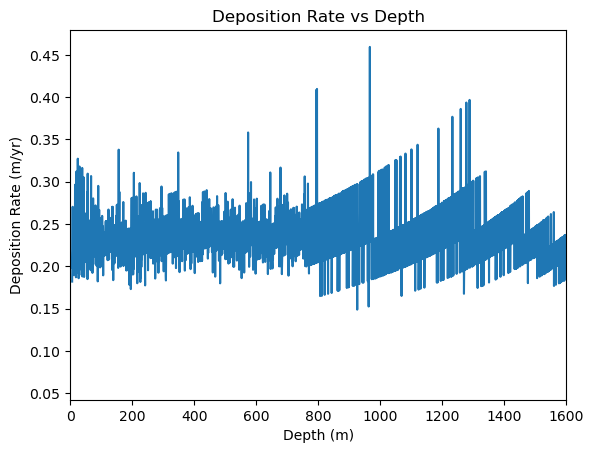

In [15]:
plt.plot(temp['depth'], temp['deporate'])
plt.ylabel('Deposition Rate (m/yr)')
plt.xlabel('Depth (m)')
plt.title('Deposition Rate vs Depth')

plt.xlim(0,1600)

Depth monotonic increasing?: True
Number of negative depth diffs: 0
Indices where depth goes backwards (show first 10): []
Duplicate depth rows: 0


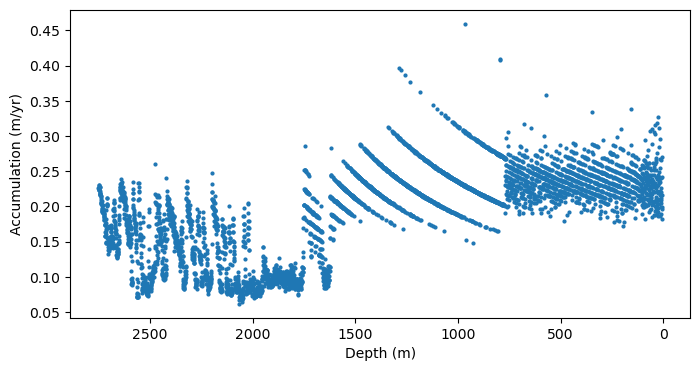

In [16]:
# assume df is your accumulation DataFrame and has columns 'depth' and 'accumulation'
df = temp.copy()

# 1) Is depth monotonic (increasing)?
print("Depth monotonic increasing?:", df['depth'].is_monotonic_increasing)

# 2) Any negative jumps in depth?
ddepth = df['depth'].diff()
print("Number of negative depth diffs:", (ddepth < 0).sum())
neg_idx = ddepth[ddepth < 0].index
print("Indices where depth goes backwards (show first 10):", neg_idx[:10].tolist())

# 3) Are there duplicate depths?
dups = df['depth'].duplicated().sum()
print("Duplicate depth rows:", dups)
if dups:
    print(df[df['depth'].duplicated(keep=False)].sort_values('depth').head(20))

# 4) Quick visual: plot as scatter (no connecting lines)
plt.figure(figsize=(8,4))
plt.scatter(df['depth'], df['deporate'], s=4)
plt.gca().invert_xaxis()  # if you normally plot depth with 0 at top; optional
plt.xlabel('Depth (m)'); plt.ylabel('Accumulation (m/yr)')
plt.show()